#### 🔵Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import random
import os

#### 🔵Load Dataset

In [2]:
train_dir = "wastes/train"
test_dir = "wastes/test"
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (128,128),
    batch_size = 32
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = (128,128),
    batch_size = 32
)

Found 9214 files belonging to 9 classes.
Found 2308 files belonging to 9 classes.


#### 🔵Store Class Names

In [3]:
class_names = train_ds.class_names
print("Classes: ",class_names)

Classes:  ['E-waste', 'automobile wastes', 'battery waste', 'glass waste', 'light bulbs', 'metal waste', 'organic waste', 'paper waste', 'plastic waste']


#### 🔵Prepare Dataset for Training

In [4]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### 🔵Normalization of Images

In [5]:
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x,y: (normalization_layer(x), y))

#### 🔵Bulid CNN Model

In [6]:
num_classes = len(class_names)
model = models.Sequential([
    layers.Input(shape=(128,128,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,801 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

#### 🔵Compile Model

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### 🔵Train Model

In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history=model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 230s 452ms/step - accuracy: 0.2561 - loss: 1.9823 - val_accuracy: 0.2916 - val_loss: 1.8542
Epoch 2/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 110s 380ms/step - accuracy: 0.3473 - loss: 1.7786 - val_accuracy: 0.3765 - val_loss: 1.7037
Epoch 3/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 128s 446ms/step - accuracy: 0.4008 - loss: 1.6564 - val_accuracy: 0.3982 - val_loss: 1.6664
Epoch 4/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 121s 372ms/step - accuracy: 0.4657 - loss: 1.5120 - val_accuracy: 0.4185 - val_loss: 1.6446
Epoch 5/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 136s 350ms/step - accuracy: 0.5283 - loss: 1.3252 - val_accuracy: 0.4385 - val_loss: 1.6333
Epoch 6/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 138s 336ms/step - accuracy: 0.6108 - loss: 1.0902 - val_accuracy: 0.4610 - val_loss: 1.6986
Epoch 7/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 146s 350ms/step - accuracy: 0.6990 - loss: 0.8669 - val_accuracy: 0.4593 - val_loss: 1.7822
Epoch 8/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 137s 334ms/step - accuracy: 0.7661 -

#### 🔵Plot Accuracy & Loss

Text(0.5, 1.0, 'Loss')

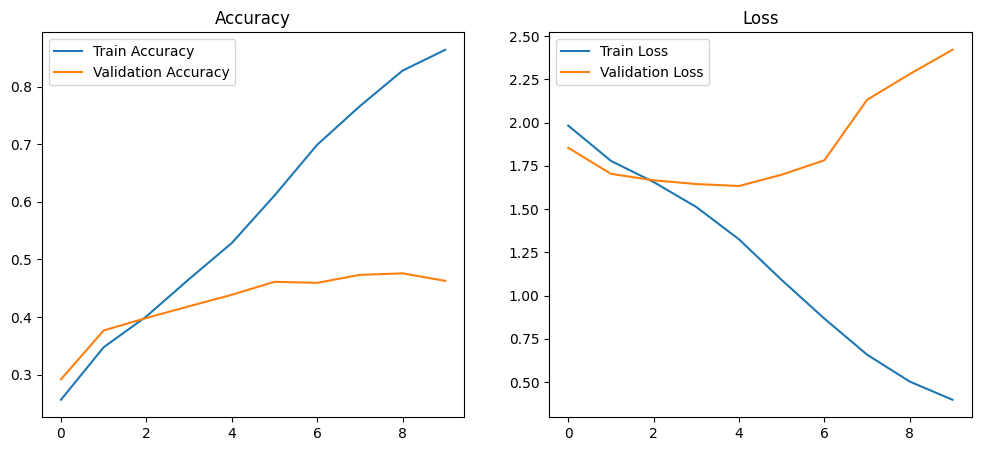

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

#### 🔵Test Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


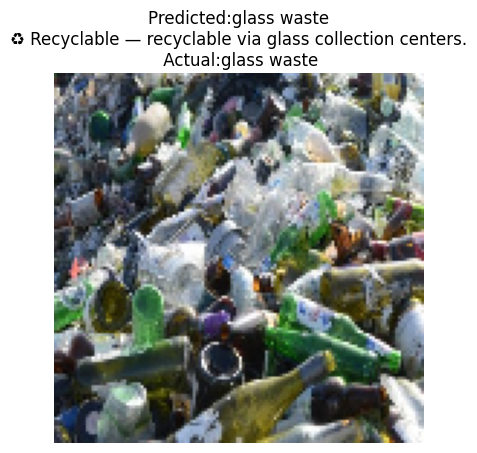

In [11]:
test_folder = "wastes/test"
random_class = random.choice(os.listdir(test_folder))
random_image = random.choice(os.listdir(os.path.join(test_folder, random_class)))
img_path = os.path.join(test_folder, random_class, random_image)

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)/255.0

pred = model.predict(img_array)
predicted_class=class_names[np.argmax(pred)]
recyclable_info = {
    'plastic waste': '♻ Recyclable — send to plastic recycling.',
    'paper waste': '♻ Recyclable — paper and cardboard can be reused.',
    'metal waste': '♻ Recyclable — can be melted and reformed.',
    'glass waste': '♻ Recyclable — recyclable via glass collection centers.',
    'organic waste': '♻️ Biodegradable — compost it.',
    'E-waste': '⚡ Hazardous — dispose at e-waste center.',
    'battery waste': '⚠ Hazardous — drop at battery collection bins.',
    'light bulbs': '⚠ Hazardous — special recycling required.',
    'automobile wastes': '⚙ Partially recyclable — metal and rubber parts reusable.'
}
recycle_status = recyclable_info.get(predicted_class)

plt.imshow(img)
plt.title(f"Predicted:{predicted_class}\n{recycle_status}\n Actual:{random_class}")
plt.axis("off")
plt.show()

#### 🔵Save the Model

In [16]:
model.save("Waste_Classifier.h5")
print("Model saved successfully!")

Model saved successfully!
